<a href="https://colab.research.google.com/github/JF11579/Plotly_RE/blob/main/condo_generic_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

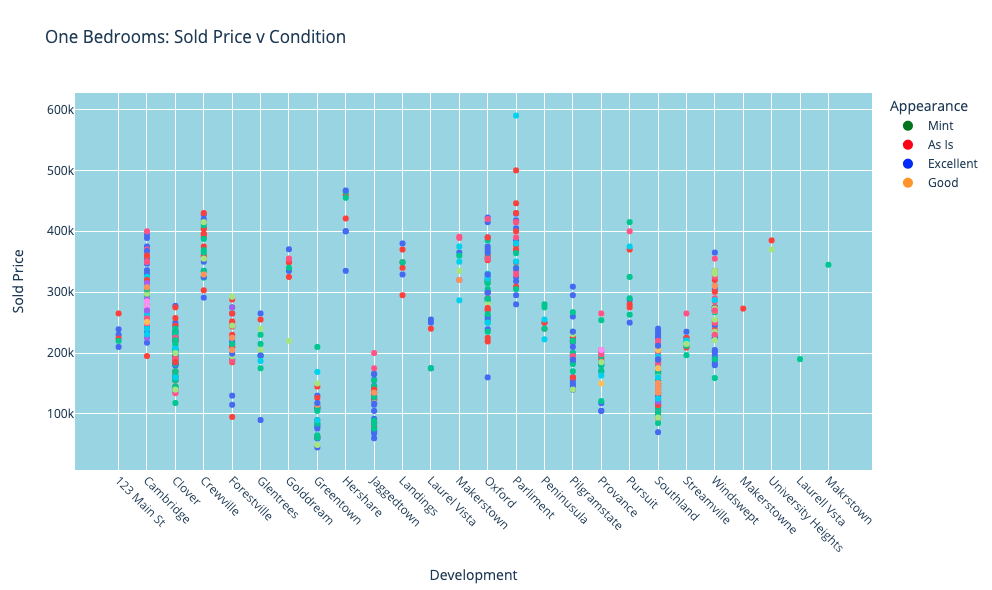

# *Appearances Dont Count for Much and Here is the Proof*

### We are looking at condo units here.  By definition, to the square milimeter, condos are identical to one another except for the Floor Level and the Appearance/Condition.

### But why then are the  Green dots signifying Mint --the best condition--  not consistantly on the top?

### This is 2 years of sales data that I annoymized.  The Python code can be found HERE.  The original notebooks was done in interactive Plotly.  The annonymized data can be found HERE.





Libraries

In [1]:
# # !pip install geopandas
# # !pip install geopy
# ! pip install plotly
# ! pip install plotly --upgrade

In [2]:
import pandas as pd
from google.colab import drive
import plotly.express as px
import numpy as np
import plotly.graph_objects as go

# options

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Data

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change to the directory containing your CSV
%cd /content/drive/MyDrive/DATA/Real_Estate_Data

Mounted at /content/drive
/content/drive/MyDrive/DATA/Real_Estate_Data


In [103]:
condo = pd.read_csv('condo_Oct_14_random_3.csv')

# Pre-Processing

In [104]:
# fix the olumn names
condo.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)

In [105]:
# purge duplicate ML#s
condo = condo.drop_duplicates(subset=['ML#'], keep='first')

In [ ]:
# Selectthe columns that we are intersted in
condo[['ML#', 'Style','Development','Sold_Price',
                   'Bath','Bedrooms','Appearance',
                'Unit_on_Floor_#','Contract_Date','Town']]

In [107]:
condo.head(3)

,ML#,Style,Development,Sold_Price,Baths_Half,Bath,Bedrooms,Appearance,Unit_on_Floor_#,Days_On_Market,Contract_Date,Listing_Price,Town
0,2,Other,123 Main St,239000,1,0,1,NaN,2,26,6/27/2020,239000,Eastern
1,1,Co-Op,123 Main St,224000,1,1,1,Mint,1,130,03/06/2020,229000,Eastern
2,5,Other,123 Main St,210000,1,0,1,NaN,1,142,12/11/2020,235000,Eastern


### Correct Floor Numbers

In [108]:

#
condo['Unit_on_Floor_#'] = condo['Unit_on_Floor_#'].replace(0, 1)


In [109]:
floor_number = sorted(condo['Unit_on_Floor_#'].unique())
floor_number

[1, 2]

In [110]:
#condo['Bedrooms'].fillna(1, inplace=True)

# Then, convert the column to integers
condo['Unit_on_Floor_#'] = condo['Unit_on_Floor_#'].astype(int)

# Convert 'Bedrooms' to a categorical data type
condo['Unit_on_Floor_#'] = condo['Unit_on_Floor_#'].astype('category')

### Correct Appearance:
  make them uniform
  Add ordinal numbers
  

In [111]:
# Convert 'Appearance' to a common data type (e.g., str)
condo['Appearance'] = condo['Appearance'].astype(str)

In [ ]:
# get list of all APpearance descriptions
Appearance_terms = sorted(condo['Appearance'].unique())
Appearance_terms

In [65]:
#condo['Development'] = condo['Development'].replace(['Brettonwoods', 'Bretton Wood','Brenton Woods', 'Brettenwoods', 'Bretton Woods', 'Bretton Woods Condo', 'Bretton Woods Country Cl'], "Bretton Woods")
condo['Appearance'] = condo['Appearance'].replace(['6M Mint', 'Exc/Mint', 'MINT',
 'MINT +',
 'MINT ++',
 'MINT!',
 'MINT++',
 'Mint',
 'Mint *',
 'Mint +',
 'Mint ++',
 'Mint +++',
 'Mint ++++',
 'Mint+',
 'Mint++',
 'Mint+++','DIAMOND',
 'DIAMOND++',
 'DIAMOND+++',
 'DIamond',
 'Diam',
 'Diamnond++',
 'Diamod',
 'Diamond',
 'Diamond +',
 'Diamond ++',
 'Diamond+',
 'Diamond++',
 'Diamond+++', 'diamond',
 'diamond +',
 'diamond ++',
 'diamond!!',
 'diamond+','mINT',
 'mint',
 'mint +',
 'mint+',
 'mint++',
 'mint+++',
 'mlnt++','Perfect',
 'Prestine',
 'Pristene',
 'Pristine',
 'Superb',
 'munt ++','pristene',
 'pristine','perfect','Beautiful', 'Gorgeous','New'], "Mint")

In [113]:
condo['Appearance'] = condo['Appearance'].replace(['As is',
 'As-Is','needs tlc','Unknown','NAN', 'nan'], 'As Is')

In [114]:
condo['Appearance'] = condo['Appearance'].replace(['EXC ++',
 'EXCELLENT',
 'Exc +',
 'Exc+',
 'Excel ++',
 'Excellant',
 'Excellent',
 'Excellent+',
 'Exel++','excel',
 'excellant',
 'excellent', 'new',
 'very good','Great'], 'Excellent')

In [115]:
condo['Appearance'] = condo['Appearance'].replace([ 'Fair',
 'GOOD',
 'Godd',
 'Good',
 'Good/dated','Move In',
 'Move in','move in','Average',
 'Avg','Nice!','Updated', 'Very Good',
 'Very good',
 'good',
 'great'], 'Good')

In [116]:
# get list of all APpearance descriptions
Appearance_terms = sorted(condo['Appearance'].unique())
Appearance_terms

['6M Mint',
 'As Is',
 'Beautiful',
 'DIAMOND',
 'DIAMOND++',
 'DIAMOND+++',
 'DIamond',
 'Diam',
 'Diamnond++',
 'Diamod',
 'Diamond',
 'Diamond +',
 'Diamond ++',
 'Diamond+',
 'Diamond++',
 'Diamond+++',
 'Exc/Mint',
 'Excellent',
 'Good',
 'Gorgeous',
 'MINT',
 'MINT +',
 'MINT ++',
 'MINT!',
 'MINT++',
 'Mint',
 'Mint *',
 'Mint +',
 'Mint ++',
 'Mint +++',
 'Mint ++++',
 'Mint+',
 'Mint++',
 'Mint+++',
 'New',
 'Perfect',
 'Prestine',
 'Pristene',
 'Pristine',
 'Superb',
 'diamond',
 'diamond +',
 'diamond ++',
 'diamond!!',
 'diamond+',
 'mINT',
 'mint',
 'mint +',
 'mint+',
 'mint++',
 'mint+++',
 'mlnt++',
 'munt ++',
 'perfect',
 'pristene',
 'pristine']

## Correct Bedrooms

In [117]:
condo['Bedrooms'].fillna(1, inplace=True)

# Then, convert the column to integers
condo['Bedrooms'] = condo['Bedrooms'].astype(int)

# Convert 'Bedrooms' to a categorical data type
condo['Bedrooms'] = condo['Bedrooms'].astype('category')

## Corrct Baths

In [118]:
condo['Bath'].fillna(1, inplace=True)

In [119]:
condo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1367 entries, 0 to 1366
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ML#              1367 non-null   int64   
 1   Style            1361 non-null   object  
 2   Development      1367 non-null   object  
 3   Sold_Price       1367 non-null   int64   
 4   Baths_Half       1367 non-null   int64   
 5   Bath             1367 non-null   int64   
 6   Bedrooms         1367 non-null   category
 7   Appearance       1367 non-null   object  
 8   Unit_on_Floor_#  1367 non-null   category
 9   Days_On_Market   1367 non-null   int64   
 10  Contract_Date    1367 non-null   object  
 11  Listing_Price    1367 non-null   int64   
 12  Town             1367 non-null   object  
dtypes: category(2), int64(6), object(5)
memory usage: 131.1+ KB


## Extract dates

In [120]:
condo['Contract_Date'] = pd.to_datetime(condo['Contract_Date'])
condo['Year'] = condo['Contract_Date'].dt.year

### which of the 2 below?

In [121]:
condo['Month_Year'] = condo['Contract_Date'].dt.strftime('%m-%Y')

In [75]:
# condo['Year'] = condo['Year'].astype('datetime64[ns]')
# condo['Month_Year'] = condo['Month_Year'].astype('datetime64[ns]')

In [122]:
condo['Month'] = condo['Contract_Date'].dt.strftime('%m')

In [77]:
condo.head()

,ML#,Style,Development,Sold_Price,Baths_Half,Bath,Bedrooms,Appearance,Unit_on_Floor_#,Days_On_Market,Contract_Date,Listing_Price,Town,Year,Month_Year,Month
0,2,Other,123 Main St,239000,1,0,1,As Is,2,26,2020-06-27,239000,Eastern,2020,06-2020,06
1,1,Co-Op,123 Main St,224000,1,1,1,Mint,1,130,2020-03-06,229000,Eastern,2020,03-2020,03
2,5,Other,123 Main St,210000,1,0,1,As Is,1,142,2020-12-11,235000,Eastern,2020,12-2020,12
3,4,Other,123 Main St,230000,1,0,1,As Is,2,12,2020-11-11,235000,Eastern,2020,11-2020,11
4,6,Garden Apartment,123 Main St,265000,1,0,1,Mint,2,21,2022-09-09,269000,Eastern,2022,09-2022,09


# Initial Plot: All Developments Price v Appearance

In [123]:
# Create the scatter plot
initial_plot_data = condo
fig = px.scatter(data_frame= initial_plot_data, x='Development', y='Sold_Price', color='Bedrooms',
                 title='All Condos:  Sold Price vs. Development',
                 labels={'Development': 'Development', 'Sold_Price': 'Sold Price', 'Town': 'Town'},
                 hover_data=['Development'])

# Show the legend
fig.update_traces(showlegend=True)

# Update the x-axis labels to be rotated 180 degrees
fig.update_layout(xaxis=dict(tickangle=45))

# Show the figure
#fig.show()




fig.update_layout(template='plotly_white')
fig.update_layout(width=1000)
fig.update_layout(height= 600)


# Change the background color to black
fig.update_layout(plot_bgcolor='lightblue')

fig.show()

### There is a problem with our Developments.  At least 123 Main is showing multiple times. This is becasue of some data entry error like a typo or a differnt number of blank spaces.

### Another issue is that I happen to know none of the Developments have more than 2 bedroom so we wil change anything greater than 2 to 2

In [124]:

condo['Bedrooms'] = condo['Bedrooms'].astype(int)
#condo['Bedrooms'] = condo['Bedrooms'].clip(0, 2)
condo['Bedrooms'] = condo['Bedrooms'].clip(upper=2)
# Convert 'Bedrooms' to a categorical data type
condo['Bedrooms'] = condo['Bedrooms'].astype('category')


## Clean up Developments

In [125]:
condo['Development'].unique()

array(['123    Main St', '123 Main St', '123 Maine St', 'Beach Manor',
       'Brookstown', 'Bucolic', 'Cam Bridge', 'Cambridg', 'Cambridge',
       'Cambridged', 'Cambrige', 'Camebridge', 'Capital Height',
       'Capital Heights', 'Capitalheights', 'Clover', 'Cran Berrie',
       'Cranberry', 'Crane Berry', 'Crewville', 'Eastown', 'Forestville',
       'Glentrees', 'Golddream', 'Greentown', 'Hamptown', 'Hershare',
       'Jaggedtown', 'Landings', 'Laurel Vista', 'Laurell Vsta',
       'Makerstown', 'Makerstowne', 'Makerstsown', 'Makrstown',
       'Mapletown', 'Oxford', 'Parliment', 'Peninusula', 'Pilgramstate',
       'Provance', 'Pursuit', 'Southland', 'Streamville',
       'University Heights', 'Windswept', 'Wolfville', 'Yellowstone'],
      dtype=object)

Plot here before cleaning Developments

In [126]:
condo['Development'] = condo['Development'].replace(['123    Main St', '123 Main St', '123 Maine St'], '123 Main St')

In [127]:
condo['Development'] = condo['Development'].replace(['Cam Bridge', 'Cambridg', 'Cambridge',
       'Cambridged', 'Cambrige', 'Camebridge'], 'Cambridge')

In [128]:
condo['Development'] = condo['Development'].replace([ 'Capital Height',
       'Capital Heights', 'Capitalheights'], 'Capital Heights')

In [129]:
condo['Development'] = condo['Development'].replace(['Cran Berrie',
       'Cranberry', 'Crane Berry' ], 'Cranberry')

In [130]:
condo['Development'].unique()

array(['123 Main St', 'Beach Manor', 'Brookstown', 'Bucolic', 'Cambridge',
       'Capital Heights', 'Clover', 'Cranberry', 'Crewville', 'Eastown',
       'Forestville', 'Glentrees', 'Golddream', 'Greentown', 'Hamptown',
       'Hershare', 'Jaggedtown', 'Landings', 'Laurel Vista',
       'Laurell Vsta', 'Makerstown', 'Makerstowne', 'Makerstsown',
       'Makrstown', 'Mapletown', 'Oxford', 'Parliment', 'Peninusula',
       'Pilgramstate', 'Provance', 'Pursuit', 'Southland', 'Streamville',
       'University Heights', 'Windswept', 'Wolfville', 'Yellowstone'],
      dtype=object)

## now let us re-run the plot

In [131]:
# Create the scatter plot
fig = px.scatter(data_frame=condo, x='Development', y='Sold_Price', color='Bedrooms',
                 title='All Condos:  Sold Price vs. Development',
                 labels={'Development': 'Development', 'Sold_Price': 'Sold Price', 'Town': 'Town'},
                 hover_data=['Development'])

# Show the legend
fig.update_traces(showlegend=True)

# Update the x-axis labels to be rotated 180 degrees
fig.update_layout(xaxis=dict(tickangle=45))

# Show the figure
#fig.show()




fig.update_layout(template='plotly_white')
fig.update_layout(width=1000)
fig.update_layout(height= 600)


# Change the background color to black
fig.update_layout(plot_bgcolor='lightblue')

fig.show()

# Plot:
Let us take a look at just 1 Bedroom units vis e vis Appearance

In [132]:
# Create a color mapping dictionary
color_mapping = {
    'Mint': 'green',
    'As Is': 'red',
    'Excellent': 'blue',
    'Good': 'orange'
}

import plotly.graph_objects as go

One_Bedroom = condo[condo['Bedrooms'] == 1]

# Create the scatter plot first
fig = px.scatter(data_frame=One_Bedroom, x='Development', y='Sold_Price', color='Appearance',
                 title='One Bedrooms: Sold Price v Condition',
                 labels={'Development': 'Development', 'Sold_Price': 'Sold Price', 'Town': 'Town'},
                 hover_data=['Development'])

# Remove the default legend
fig.update_traces(showlegend=False)

# Customize the legend labels
for appearance, color in color_mapping.items():
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers',
                             marker=dict(size=10, color=color), name=appearance))

# Update the layout for the desired width and height
fig.update_layout(width=1000, height=600)

fig.update_layout(xaxis=dict(tickangle=45))

# Change the background color
fig.update_layout(plot_bgcolor='lightblue')

# Show the plot
fig.show()

## Maybe it has to do with the floor level?  Let us examine teh 1st and 2nd floor indivudually

In [137]:
# prompt: filter for floor level = 1

floor_1 = condo[condo['Unit_on_Floor_#'] == 1]

# Create a color mapping dictionary
color_mapping = {
    'Mint': 'green',
    'As Is': 'red',
    'Excellent': 'blue',
    'Good': 'orange'
}

import plotly.graph_objects as go

#One_Bedroom = condo[condo['Bedrooms'] == 1]

# Create the scatter plot first
fig = px.scatter(data_frame= floor_1, x='Development', y='Sold_Price', color='Appearance',
                 title='First Floor Only: Sold Price v Condition',
                 labels={'Development': 'Development', 'Sold_Price': 'Sold Price', 'Town': 'Town'},
                 hover_data=['Development'])

# Remove the default legend
fig.update_traces(showlegend=False)

# Customize the legend labels
for appearance, color in color_mapping.items():
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers',
                             marker=dict(size=10, color=color), name=appearance))

# Update the layout for the desired width and height
fig.update_layout(width=1000, height=600)

fig.update_layout(xaxis=dict(tickangle=45))

# Change the background color
fig.update_layout(plot_bgcolor='lightblue')

# Show the plot
fig.show()



## Well tha tis no better.  Let us take a look only at the 2nd floor

In [138]:
floor_2 = condo[condo['Unit_on_Floor_#'] == 2]

# Create a color mapping dictionary
color_mapping = {
    'Mint': 'green',
    'As Is': 'red',
    'Excellent': 'blue',
    'Good': 'orange'
}

import plotly.graph_objects as go


# Create the scatter plot first
fig = px.scatter(data_frame= floor_2, x='Development', y='Sold_Price', color='Appearance',
                 title='First Floor Only: Sold Price v Condition',
                 labels={'Development': 'Development', 'Sold_Price': 'Sold Price', 'Town': 'Town'},
                 hover_data=['Development'])

# Remove the default legend
fig.update_traces(showlegend=False)

# Customize the legend labels
for appearance, color in color_mapping.items():
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers',
                             marker=dict(size=10, color=color), name=appearance))

# Update the layout for the desired width and height
fig.update_layout(width=1000, height=600)

fig.update_layout(xaxis=dict(tickangle=45))

# Change the background color
fig.update_layout(plot_bgcolor='lightblue')

# Show the plot
fig.show()

In [134]:
condo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1367 entries, 0 to 1366
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ML#              1367 non-null   int64         
 1   Style            1361 non-null   object        
 2   Development      1367 non-null   object        
 3   Sold_Price       1367 non-null   int64         
 4   Baths_Half       1367 non-null   int64         
 5   Bath             1367 non-null   int64         
 6   Bedrooms         1367 non-null   category      
 7   Appearance       1367 non-null   object        
 8   Unit_on_Floor_#  1367 non-null   category      
 9   Days_On_Market   1367 non-null   int64         
 10  Contract_Date    1367 non-null   datetime64[ns]
 11  Listing_Price    1367 non-null   int64         
 12  Town             1367 non-null   object        
 13  Year             1367 non-null   int64         
 14  Month_Year       1367 non-null   object 

In [88]:
# # Map the 'Appearance' values to colors
# color_mapping = {
#     'Mint': 'green',
#     'As Is': 'red',
#     'Excellent': 'blue',
#     'Good': 'orange'
# }

# # Apply the color mapping to the DataFrame
# condo['Color'] = [color_mapping[appearance] for appearance in condo['Appearance']]


# fig = px.scatter(data_frame=condo, x='Development', y='Sold_Price', color='Color',
#                  title='Sold Price v Condition',
#                  labels={'Development': 'Development', 'Sold_Price': 'Sold Price'},
#                  hover_data=['Development'],
#                  color_discrete_map=color_mapping)

# fig.update_layout(xaxis=dict(tickangle=45))

# # Update the layout for the desired width and height
# fig.update_layout(width=1000, height=600)

# # Change the background color
# fig.update_layout(plot_bgcolor='lightblue')

# # Show the plot
# fig.show()

In [89]:

# One_Bedroom = condo[condo['Bedrooms'] == 1]

# # Create the scatter plot first
# fig = px.scatter(data_frame=One_Bedroom, x='Development', y='Sold_Price', color='Appearance',
#                  title='One Bedrooms: First Floor  Sold Price v Condition',
#                  labels={'Development': 'Development', 'Sold_Price': 'Sold Price', 'Town': 'Town'},
#                  hover_data=['Development'])

# # Show the legend
# fig.update_traces(showlegend=True) ### <<<=====

# # Update the x-axis labels to be rotated 180 degrees
# fig.update_layout(xaxis=dict(tickangle=45))


# # fig.update_layout(template='plotly_white')
# fig.update_layout(width=1000)
# fig.update_layout(height= 600)

# # Define the category order
# #category_order = ['As Is', 'Good', 'Excellent', 'Mint']
# # Update the layout to specify the category order
# #fig.update_yaxes(categoryorder=category_order)

# # Change the background color to black
# fig.update_layout(plot_bgcolor='lightblue')
# # ...

# # Customize the legend labels
# for appearance, color in color_mapping.items():
#     fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers',
#                              marker=dict(size=10, color=color), name=appearance))

# # Update the x-axis labels to be rotated 180 degrees
# fig.update_layout(xaxis=dict(tickangle=45))

# # Update the layout for the desired width and height
# fig.update_layout(width=1000, height=600)

# # Change the background color
# fig.update_layout(plot_bgcolor='lightblue')

# # Show the plot ###############
# fig.show()





In [90]:
# Create a color mapping dictionary
color_mapping = {
    'Mint': 'green',
    'As Is': 'red',
    'Excellent': 'blue',
    'Good': 'orange'
}

import plotly.graph_objects as go

Two_bedrooms = condo[condo['Bedrooms'] == 2]

# Create the scatter plot first
fig = px.scatter(data_frame= Two_bedrooms, x='Development', y='Sold_Price', color='Appearance',
                 title='Two Bedrooms:  Sold Price v Condition',
                 labels={'Development': 'Development', 'Sold_Price': 'Sold Price', 'Town': 'Town'},
                 hover_data=['Development'])

# Remove the default legend
fig.update_traces(showlegend=False)

# Customize the legend labels
for appearance, color in color_mapping.items():
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers',
                             marker=dict(size=10, color=color), name=appearance))

# Update the layout for the desired width and height
fig.update_layout(width=1000, height=600)

# Change the background color
fig.update_layout(plot_bgcolor='lightblue')

# Show the plot
fig.show()

In [91]:
# import plotly.graph_objects as go

# One_Bedroom = condo[condo['Bedrooms'] == 1]

# # Create the scatter plot first
# fig = px.scatter(data_frame=One_Bedroom, x='Development', y='Sold_Price', color='Appearance',
#                  title='One Bedrooms: First Floor Sold Price v Condition',
#                  labels={'Development': 'Development', 'Sold_Price': 'Sold Price', 'Town': 'Town'},
#                  hover_data=['Development'])

# # Remove the default legend
# fig.update_traces(showlegend=False)

# # Customize the legend labels
# for appearance, color in color_mapping.items():
#     fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers',
#                              marker=dict(size=10, color=color), name=appearance))

# # Update the layout for the desired width and height
# fig.update_layout(width=1000, height=600)

# # Change the background color
# fig.update_layout(plot_bgcolor='lightblue')

# # Show the plot
# fig.show()


In [92]:
# import plotly.graph_objects as go

# One_Bedroom = condo[condo['Bedrooms'] == 1]

# # Create the scatter plot first
# fig = px.scatter(data_frame=One_Bedroom, x='Development', y='Sold_Price', color='Appearance',
#                  title='One Bedrooms: First Floor  Sold Price v Condition',
#                  labels={'Development': 'Development', 'Sold_Price': 'Sold Price', 'Town': 'Town'},
#                  hover_data=['Development'])

# # Customize the legend labels
# for appearance, color in color_mapping.items():
#     fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers',
#                              marker=dict(size=10, color=color), name=appearance))

# # Customize the layout
# fig.update_layout(
#     title='One Bedrooms: First Floor Sold Price v Condition',
#     xaxis_title='Development',
#     yaxis_title='Sold Price',
#     xaxis=dict(tickangle=45),
#     width=1000,
#     height=600,
#     plot_bgcolor='lightblue',
#     showlegend=True,
#     legend=dict(
#         itemsizing='constant',  # To ensure constant size legend items
#         itemclick=False,  # To prevent clicking on legend items
#     )
# )

# # Show the plot
# fig.show()



In [93]:
import plotly.graph_objects as go

One_Bedroom = condo[condo['Bedrooms'] == 1]

# Create the scatter plot first
fig = px.scatter(data_frame=One_Bedroom, x='Development', y='Sold_Price', color='Appearance',
                 title='One Bedrooms: First Floor Sold Price v Condition',
                 labels={'Development': 'Development', 'Sold_Price': 'Sold Price', 'Town': 'Town'},
                 hover_data=['Development'])

# Remove the default legend
fig.update_traces(showlegend=False)

# Customize the legend labels
for appearance, color in color_mapping.items():
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers',
                             marker=dict(size=10, color=color), name=appearance))

# Update the layout for the desired width and height
fig.update_layout(width=1000, height=600)

# Change the background color
fig.update_layout(plot_bgcolor='lightblue')

# Show the plot
fig.show()

# And for th 2nd floor vis e vis Appearcne

In [94]:
 Second_Floor = condo[condo['Bedrooms'] == 2]
# Create a color mapping dictionary
color_mapping = {
    'Mint': 'green',
    'As Is': 'red',
    'Excellent': 'blue',
    'Good': 'orange'
}

import plotly.graph_objects as go

One_Bedroom = condo[condo['Bedrooms'] == 1]

# Create the scatter plot first
fig = px.scatter(data_frame= Second_Floor, x='Development', y='Sold_Price', color='Appearance',
                 title='One Bedrooms: Second Floor Sold Price v Condition',
                 labels={'Development': 'Development', 'Sold_Price': 'Sold Price', 'Town': 'Town'},
                 hover_data=['Development'])

# Remove the default legend
fig.update_traces(showlegend=False)

# Customize the legend labels
for appearance, color in color_mapping.items():
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers',
                             marker=dict(size=10, color=color), name=appearance))

# Update the layout for the desired width and height
fig.update_layout(width=1000, height=600)

fig.update_layout(xaxis=dict(tickangle=45))

# Change the background color
fig.update_layout(plot_bgcolor='lightblue')

# Show the plot
fig.show()

In [95]:
# Second_Floor = condo[condo['Bedrooms'] == 2]

# # Create a color mapping dictionary
# color_mapping = {
#     'Mint': 'green',
#     'As Is': 'red',
#     'Excellent': 'blue',
#     'Good': 'orange'
# }

# # Create the scatter plot first
# fig = px.scatter(data_frame= Second_Floor, x='Development', y='Sold_Price', color='Appearance',
#                  title='One Bedrooms Second Floor  Sold Price v Condition',
#                  labels={'Development': 'Development', 'Sold_Price': 'Sold Price', 'Town': 'Town'},
#                  hover_data=['Development'])

# # Show the legend
# fig.update_traces(showlegend=True)

# # Update the x-axis labels to be rotated 180 degrees
# fig.update_layout(xaxis=dict(tickangle=45))


# # fig.update_layout(template='plotly_white')
# fig.update_layout(width=1000)
# fig.update_layout(height= 600)

# # Define the category order
# category_order = ['As Is', 'Good', 'Excellent', 'Mint']
# # Update the layout to specify the category order
# #fig.update_yaxes(categoryorder=category_order)

# # Change the background color to black
# fig.update_layout(plot_bgcolor='lightblue')

# Plot: Let us look at First Floor v Second Floor

In [96]:


fig = px.scatter(data_frame= condo, x='Development', y='Sold_Price', color='Unit_on_Floor_#',
                 title='Sold Price , First v Second  floors',
                 labels={'Development': 'Development', 'Sold_Price': 'Sold Price', 'Town': 'Town'},
                 hover_data=['Development'],
                 opacity=1.0)



# Show the legend
fig.update_traces(showlegend=True)

# Update the x-axis labels to be rotated 180 degrees
fig.update_layout(xaxis=dict(tickangle=45))


# fig.update_layout(template='plotly_white')
fig.update_layout(width=1000)
fig.update_layout(height= 600)

# Define the category order
category_order = ['As Is', 'Good', 'Excellent', 'Mint']
# Update the layout to specify the category order
#fig.update_yaxes(categoryorder=category_order)

# Change the background color to black
fig.update_layout(plot_bgcolor='lightblue')

## Unles sthese buildings are pyramind shape there are the same number of units on the first as on hte second floor yet second floor sales are a a rarity.  Hmmmm

In [97]:
# prompt: plotly bar graph 'Unit_on_Floor_#'

fig = px.histogram(data_frame=condo, x='Unit_on_Floor_#', color='Bedrooms', barmode='group')
fig.update_layout(template='plotly_white')
fig.update_layout(width=1000)
fig.update_layout(height= 600)
fig.update_layout(plot_bgcolor='lightblue')
fig.show()


## Could the 2nd floor dots be obscured by the first?

In [98]:
fig = px.scatter(data_frame= condo, x='Development', y='Sold_Price', color='Unit_on_Floor_#',
                 title='Greater Opacity (Sold Price , First v Second  Floors)',
                 labels={'Development': 'Development', 'Sold_Price': 'Sold Price', 'Town': 'Town'},
                 hover_data=['Development'],
                 opacity=.3)



# Show the legend
fig.update_traces(showlegend=True)

# Update the x-axis labels to be rotated 180 degrees
fig.update_layout(xaxis=dict(tickangle=45))


# fig.update_layout(template='plotly_white')
fig.update_layout(width=1000)
fig.update_layout(height= 600)

# Define the category order
category_order = ['As Is', 'Good', 'Excellent', 'Mint']
# Update the layout to specify the category order
#fig.update_yaxes(categoryorder=category_order)

# Change the background color to black
fig.update_layout(plot_bgcolor='lightblue')

In [99]:
condo.head()

,ML#,Style,Development,Sold_Price,Baths_Half,Bath,Bedrooms,Appearance,Unit_on_Floor_#,Days_On_Market,Contract_Date,Listing_Price,Town,Year,Month_Year,Month
0,2,Other,123 Main St,239000,1,0,1,As Is,2,26,2020-06-27,239000,Eastern,2020,06-2020,06
1,1,Co-Op,123 Main St,224000,1,1,1,Mint,1,130,2020-03-06,229000,Eastern,2020,03-2020,03
2,5,Other,123 Main St,210000,1,0,1,As Is,1,142,2020-12-11,235000,Eastern,2020,12-2020,12
3,4,Other,123 Main St,230000,1,0,1,As Is,2,12,2020-11-11,235000,Eastern,2020,11-2020,11
4,6,Garden Apartment,123 Main St,265000,1,0,1,Mint,2,21,2022-09-09,269000,Eastern,2022,09-2022,09


In [101]:
x = y

NameError: ignored

# Basement

In [100]:
! pip install plotly
import pandas as pd
import plotly.express as px
#from plotly.graph_objects import go

# Create a Pandas DataFrame with some sample data
condo = pd.DataFrame({'Development': ['A', 'B', 'C', 'D', 'E'],
                   'Bedrooms': [1, 1, 2, 2, 3],
                   'Sold_Price': [100000, 150000, 200000, 250000, 300000],
                   'Appearance': ['As Is', 'Good', 'Excellent', 'Mint', 'Poor']})

# Map the 'Appearance' values to colors
color_mapping = {
    'Mint': 'green',
    'As Is': 'red',
    'Excellent': 'blue',
    'Good': 'orange'
}

# Apply the color mapping to the DataFrame
condo['Color'] = [color_mapping[appearance] for appearance in condo['Appearance']]

# Create the scatter plot
fig = px.scatter(data_frame=condo, x='Development', y='Sold_Price', color='Color',
                 title='Sold Price v Condition',
                 labels={'Development': 'Development', 'Sold_Price': 'Sold Price'},
                 hover_data=['Development'],
                 color_discrete_map=color_mapping)

# Hide the default legend
fig.update_layout(showlegend=False)

# Customize the legend labels
for appearance, color in color_mapping.items():
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers',
                             marker=dict(size=10, color=color), name=appearance))

# Update the legend layout to show the title and itemsizing
fig.update_layout(legend=dict(title='Condition', itemsizing='constant'))

# Update the layout for the desired width and height
fig.update_layout(width=1000, height=600)

# Change the background color
fig.update_layout(plot_bgcolor='lightblue')

# Show the plot
fig.show()

KeyError: ignored

In [ ]:
from scipy.stats import f_oneway

# Assume 'data' is your DataFrame with 'Appearance' and 'Selling_Price' columns
groups = [condo[condo['Appearance'] == category]['Sold_Price'] for category in condo['Appearance']]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*groups)

if p_value < 0.05:
    print("There is a statistically significant difference between at least two groups.")
else:
    print("There is no statistically significant difference between groups.")

In [ ]:
condo.info()